# Circonferenza Julia


Versione di Giuseppe Santorelli

In [1]:
using PyPlot

Vettore dei punti di controllo. Per il punto i-esimo la componente x è memorizzata in A[3i-2], la componente y in A[3i-1] e la componente z in A[3i]

In [2]:
k=0.552284;
n=4;
c=3;

In [3]:
A=[0 1 0 k 1 0 1 k 0 1 0 0];

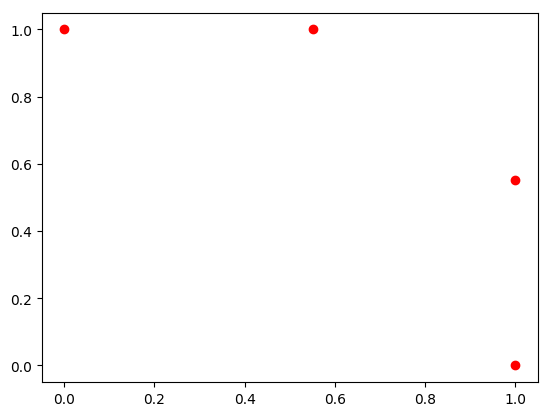

In [4]:
for i in range(1,3,4)
    plot(A[i],A[i+1],"ro")
end

#### Funzione che calcola il vettore dei nodi

- **n** numero dei punti di controllo
- **c** ordine delle funzioni di base

In [5]:
function knot(n::Int64,c::Int64)
    
    nplusc=n+c
    nplus2=n+2
    x=Array{Float64}(nplusc)
    
    x[1]=0
    
    for i=2:nplusc
        if i>c && i<nplus2
            x[i]=x[i-1]+1
        else
            x[i]=x[i-1]
        end
    end
    return x
end

knot (generic function with 1 method)

#### Funzione che calcola il vettore delle funzioni di base

- **c** ordine delle funzioni di base
- **t** parametro
- **npts** numero dei punti di controllo
- **x** vettore dei nodi

In [6]:
function basis(c::Int64,t::Float64,npts::Int64,x::Array{Float64})
    
    n = zeros(Float64,1,36)
    nplusc = npts+c
    temp = Array{Float64}(36)
    
    #calculate the first order basis functions n[i][1]
    for i=1:nplusc-1
        if t>=x[i] && t<x[i+1]
            temp[i]=1
        else
            temp[i]=0
        end
    end
    
    #calculate the higher order basis functions
    for k=2:c
        for i=1:nplusc-k
            if temp[i]!=0
                d=((t-x[i])*temp[i])/(x[i+k-1]-x[i])
            else
                d=0
            end
            if temp[i+1]!=0
                e=((x[i+k]-t)*temp[i+1])/(x[i+k]-x[i+1])
            else
                e=0
            end
            temp[i]=d+e
        end
    end
    
    if t==x[nplusc]
        temp[npts]=1
    end
    
    #put in n array
    for i=1:npts
        n[1,i]=temp[i]
    end
    if t==x[nplusc]
        n[1,npts]=1
    end
    return n[1,1:npts]
end   

basis (generic function with 1 method)

#### Funzione che calcola i punti della curva B-spline

- **npts** numero dei punti di controllo
- **c** ordine delle funzioni di base
- **p1** numero dei punti della B-spline da calcolare
- **b** vettore delle funzioni di base

In [7]:
function bspline(npts::Int64,c::Int64,p1::Int64,b::Array{Float64})
    
    nplusc=npts+c
    p=Array{Float64}(3*p1)
    
    x=knot(npts,c)
    
    icount=0
    t=0.
    
    step=x[nplusc]/(p1-1)
    
    for i1=1:p1
        if x[nplusc]-t<5e-6
            t=x[nplusc]
        end
        
        nbasis=basis(c,t,npts,x)
        
        for j=1:3
            jcount=j
            p[icount+j]=0
            for i=1:npts
                temp=nbasis[i]*b[jcount]
                p[icount+j]=p[icount+j]+temp
                jcount=jcount+3
            end
        end
        
        icount=icount+3
        t=t+step
    end
    
    return p
end

bspline (generic function with 1 method)

In [8]:
p=100;

In [9]:
curve=bspline(n,c,p,A);

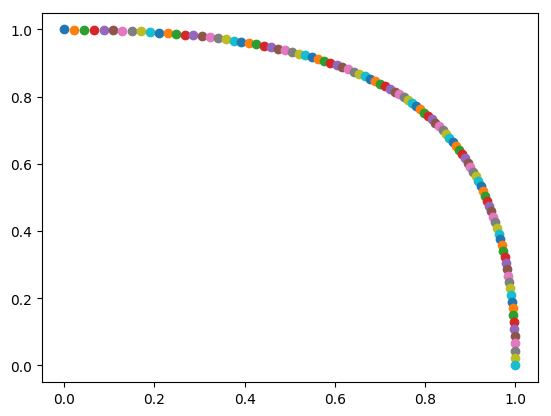

In [10]:
for i in range(1,3,p)
    plot(curve[i],curve[i+1],"o")
end

Creo i vettori di coordinate bidimensionali x e y

In [11]:
x=zeros(p);

In [12]:
y=zeros(p);

In [13]:
for i=1:p
    x[i]=curve[3*i-2]
end

In [14]:
for i=1:p
    y[i]=curve[3*i-1]
end

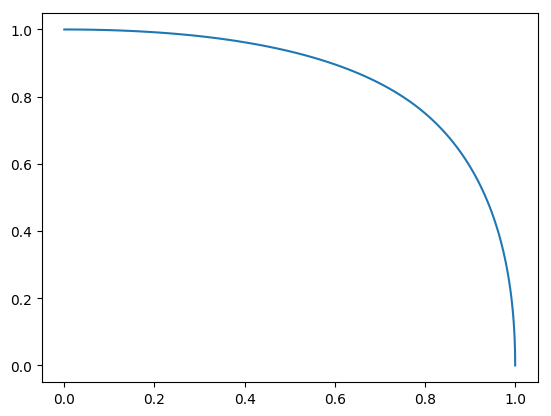

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f209c64b550>

In [15]:
plot(x,y)

Ora provo a fare la stessa cosa per gli altri archi del cerchio

In [16]:
A=[1 0 0 1 -k 0 k -1 0 0 -1 0];

In [17]:
curve=bspline(n,c,p,A);

In [18]:
x1=zeros(p);
y1=zeros(p);

In [19]:
for i=1:p
    x1[i]=curve[3*i-2]
end

In [20]:
for i=1:p
    y1[i]=curve[3*i-1]
end

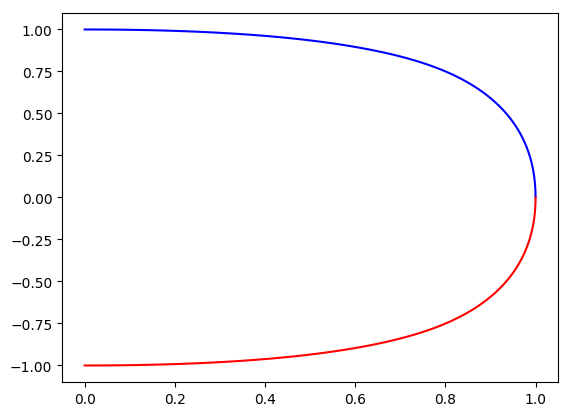

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f209c63e490>
 PyObject <matplotlib.lines.Line2D object at 0x7f209c63e550>

In [21]:
plot(x,y,"b",x1,y1,"r")

In [22]:
A=[0 -1 0 -k -1 0 -1 -k 0 -1 0 0];

In [23]:
curve=bspline(n,c,p,A);

In [24]:
x2 = zeros(p);
y2 = zeros(p);

In [25]:
for i=1:p
    x2[i]=curve[3*i-2]
end

In [26]:
for i=1:p
    y2[i]=curve[3*i-1]
end

In [27]:
A=[-1 0 0 -1 k 0 -k 1 0 0 1 0];

In [28]:
curve = bspline(n,c,p,A);

In [29]:
x3=zeros(p);
y3=zeros(p);

In [30]:
for i=1:p
    x3[i]=curve[3*i-2]
end

In [31]:
for i=1:p
    y3[i]=curve[3*i-1]
end

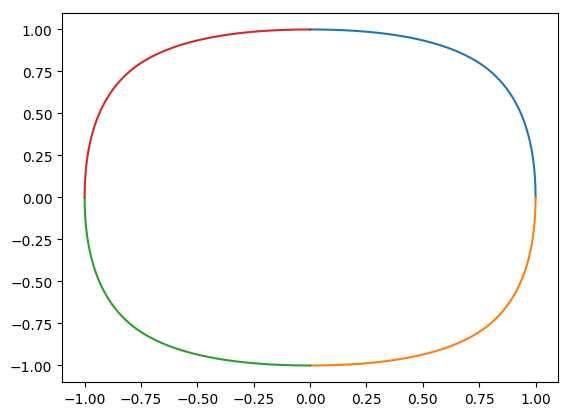

4-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f209c5bb810>
 PyObject <matplotlib.lines.Line2D object at 0x7f209c5bb8d0>
 PyObject <matplotlib.lines.Line2D object at 0x7f209c549110>
 PyObject <matplotlib.lines.Line2D object at 0x7f209c549510>

In [32]:
plot(x,y,x1,y1,x2,y2,x3,y3)

La stessa cosa si può fare creando un vettore di punti di controllo che è l'unione dei 4 vettori precedentemente utilizzati?

In [33]:
A=[0 1 0 k 1 0 1 k 0 1 0 0 1 0 0 1 -k 0 k -1 0 0 -1 0 0 -1 0 -k -1 0 -1 -k 0 -1 0 0 -1 0 0 -1 k 0 -k 1 0 0 1 0];
n=16;

In [34]:
curve = bspline(n,c,p,A);

In [35]:
X=zeros(p);
Y=zeros(p);

In [36]:
for i=1:p
    X[i]=curve[3*i-2]
end

In [37]:
for i=1:p
    Y[i]=curve[3*i-1]
end

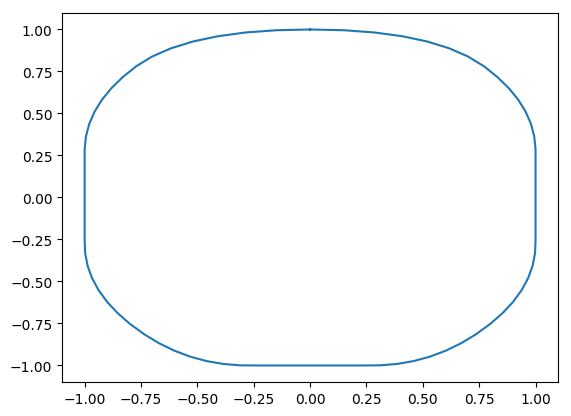

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f209c4d1410>

In [38]:
plot(X,Y)